# **Introduction:**

The aim of this project is to analyse the 2023 World Happiness Report to understand which factors in the dataset correlate most to the happiness score of a country. I will also join the data with other datasets on countries to recognise other trends such as geography and language and their correlation to the happiness score

The World Happiness Report is an annual report conducted by the Gallup World Poll which asks more than 100,000 people in 124 countries questions including ‘their perception of corruption in their country’, and their ‘freedom to make life choices’ as well as conducting the happiness score of each antion. 2023 marks their 11th year of the survey.


# **Data Importing**

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
#import world happiness record file
whr23= pd.read_csv('WHR2023.csv')

# import'world-data-2023.csv' file 
world_data = pd.read_csv('world-data-2023.csv')

# import'continent.csv' file 
continent_file= pd.read_csv('continents2.csv')

# **Data Cleaning**

In [7]:
# Now let's start joining data

# Change column names to match the main dataset
continent_file.rename(columns={'name': 'Country name', 'alpha-2': 'country code'}, inplace=True)
continent_file.head()

,Country name,country code,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [8]:
#Merge region and sub-region into whr23score after country name
column_order = ['Country name', 'region', 'sub-region', 'country code']
merged_data = whr23.merge(continent_file[['Country name', 'region', 'sub-region', 'country code']], on='Country name')
#for easier reading, let's change the column order.
column_order = ['Country name', 'region', 'sub-region', 'country code'] + [col for col in merged_data.columns if col not in column_order]
merged_data = merged_data[column_order]
merged_data.head()

,Country name,region,sub-region,country code,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Europe,Northern Europe,FI,7.804,0.036,7.875,7.733,10.792,0.969,...,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,Europe,Northern Europe,DK,7.586,0.041,7.667,7.506,10.962,0.954,...,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,Europe,Northern Europe,IS,7.530,0.049,7.625,7.434,10.896,0.983,...,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,Asia,Western Asia,IL,7.473,0.032,7.535,7.411,10.639,0.943,...,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,Europe,Western Europe,NL,7.403,0.029,7.460,7.346,10.942,0.930,...,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [9]:
# Rename the 'Country' column to 'Country name' in the extra_data DataFrame
world_data.rename(columns={'Country': 'Country name'}, inplace=True)

#Merge the data for your own new dataset
full_data = merged_data.merge(world_data[['Country name', 'Unemployment rate', 'Urban_population', 'Population', 'Official language']], on='Country name')
# Display the first few rows of the merged DataFrame
full_data.head()

,Country name,region,sub-region,country code,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Unemployment rate,Urban_population,Population,Official language
0,Finland,Europe,Northern Europe,FI,7.804,0.036,7.875,7.733,10.792,0.969,...,1.585,0.535,0.772,0.126,0.535,2.363,6.59%,"4,716,888","5,520,314",Swedish
1,Denmark,Europe,Northern Europe,DK,7.586,0.041,7.667,7.506,10.962,0.954,...,1.548,0.537,0.734,0.208,0.525,2.084,4.91%,"5,119,978","5,818,553",Danish
2,Iceland,Europe,Northern Europe,IS,7.530,0.049,7.625,7.434,10.896,0.983,...,1.620,0.559,0.738,0.250,0.187,2.250,2.84%,"339,110","361,313",Icelandic
3,Israel,Asia,Western Asia,IL,7.473,0.032,7.535,7.411,10.639,0.943,...,1.521,0.577,0.569,0.124,0.158,2.691,3.86%,"8,374,393","9,053,300",Hebrew
4,Netherlands,Europe,Western Europe,NL,7.403,0.029,7.460,7.346,10.942,0.930,...,1.488,0.545,0.672,0.251,0.394,2.110,3.20%,"15,924,729","17,332,850",Dutch


In [10]:
#Now i will check for null values
full_data.isna().sum()

Country name                                  0
region                                        0
sub-region                                    0
country code                                  1
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption 

In [11]:
# Is there any duplicate?
full_data[full_data.duplicated(keep=False)]

,Country name,region,sub-region,country code,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Unemployment rate,Urban_population,Population,Official language


In [12]:
print(full_data['Country name']== 'Congo')

0      False
1      False
2      False
3      False
4      False
       ...  
119    False
120    False
121    False
122    False
123    False
Name: Country name, Length: 124, dtype: bool


In [13]:
# Filter countries with a ladder score above 6.5
happiest_countries = full_data[full_data['Ladder score'] > 6.6]
print(happiest_countries)

      Country name    region                       sub-region country code  \
0          Finland    Europe                  Northern Europe           FI   
1          Denmark    Europe                  Northern Europe           DK   
2          Iceland    Europe                  Northern Europe           IS   
3           Israel      Asia                     Western Asia           IL   
4      Netherlands    Europe                   Western Europe           NL   
5           Sweden    Europe                  Northern Europe           SE   
6           Norway    Europe                  Northern Europe           NO   
7      Switzerland    Europe                   Western Europe           CH   
8       Luxembourg    Europe                   Western Europe           LU   
9      New Zealand   Oceania        Australia and New Zealand           NZ   
10         Austria    Europe                   Western Europe           AT   
11       Australia   Oceania        Australia and New Zealand   

In [14]:
#g Now let's add our own math an calculate the percentage living in an urban area
full_data['Urban_population'] = full_data['Urban_population'].str.replace(',', '').astype(float)
full_data['Population'] = full_data['Population'].str.replace(',', '').astype(float)
full_data['Urban_population_percentage'] = (full_data['Urban_population'] / full_data['Population']) * 100
full_data.head()

,Country name,region,sub-region,country code,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,...,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Unemployment rate,Urban_population,Population,Official language,Urban_population_percentage
0,Finland,Europe,Northern Europe,FI,7.804,0.036,7.875,7.733,10.792,0.969,...,0.535,0.772,0.126,0.535,2.363,6.59%,4716888.0,5520314.0,Swedish,85.446009
1,Denmark,Europe,Northern Europe,DK,7.586,0.041,7.667,7.506,10.962,0.954,...,0.537,0.734,0.208,0.525,2.084,4.91%,5119978.0,5818553.0,Danish,87.994008
2,Iceland,Europe,Northern Europe,IS,7.530,0.049,7.625,7.434,10.896,0.983,...,0.559,0.738,0.250,0.187,2.250,2.84%,339110.0,361313.0,Icelandic,93.854912
3,Israel,Asia,Western Asia,IL,7.473,0.032,7.535,7.411,10.639,0.943,...,0.577,0.569,0.124,0.158,2.691,3.86%,8374393.0,9053300.0,Hebrew,92.501000
4,Netherlands,Europe,Western Europe,NL,7.403,0.029,7.460,7.346,10.942,0.930,...,0.545,0.672,0.251,0.394,2.110,3.20%,15924729.0,17332850.0,Dutch,91.875998


In [27]:
full_data.columns

Index(['Country name', 'region', 'sub-region', 'country code', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Unemployment rate', 'Urban_population',
       'Population', 'Official language', 'Urban_population_percentage'],
      dtype='object')

# **Data Visualisation**

In [15]:
#calculate correlation coefficients

social_support_corr= full_data['Ladder score'].corr(full_data['Social support'])
healthy_life_corr= full_data['Ladder score'].corr(full_data['Healthy life expectancy'])
urban_pop_corr= full_data['Ladder score'].corr(full_data['Urban_population_percentage'])
gdp_corr= full_data['Ladder score'].corr(full_data['Logged GDP per capita'])
corruption_corr= full_data['Ladder score'].corr(full_data['Perceptions of corruption'])
freedom_corr= full_data['Ladder score'].corr(full_data['Freedom to make life choices'])

print(social_support_corr, 
healthy_life_corr,
urban_pop_corr,
gdp_corr,
corruption_corr,
freedom_corr )

0.8470697892786817 0.7665886508235213 0.6347065002576935 0.7885295077639135 -0.48501135765326003 0.6537208623572299


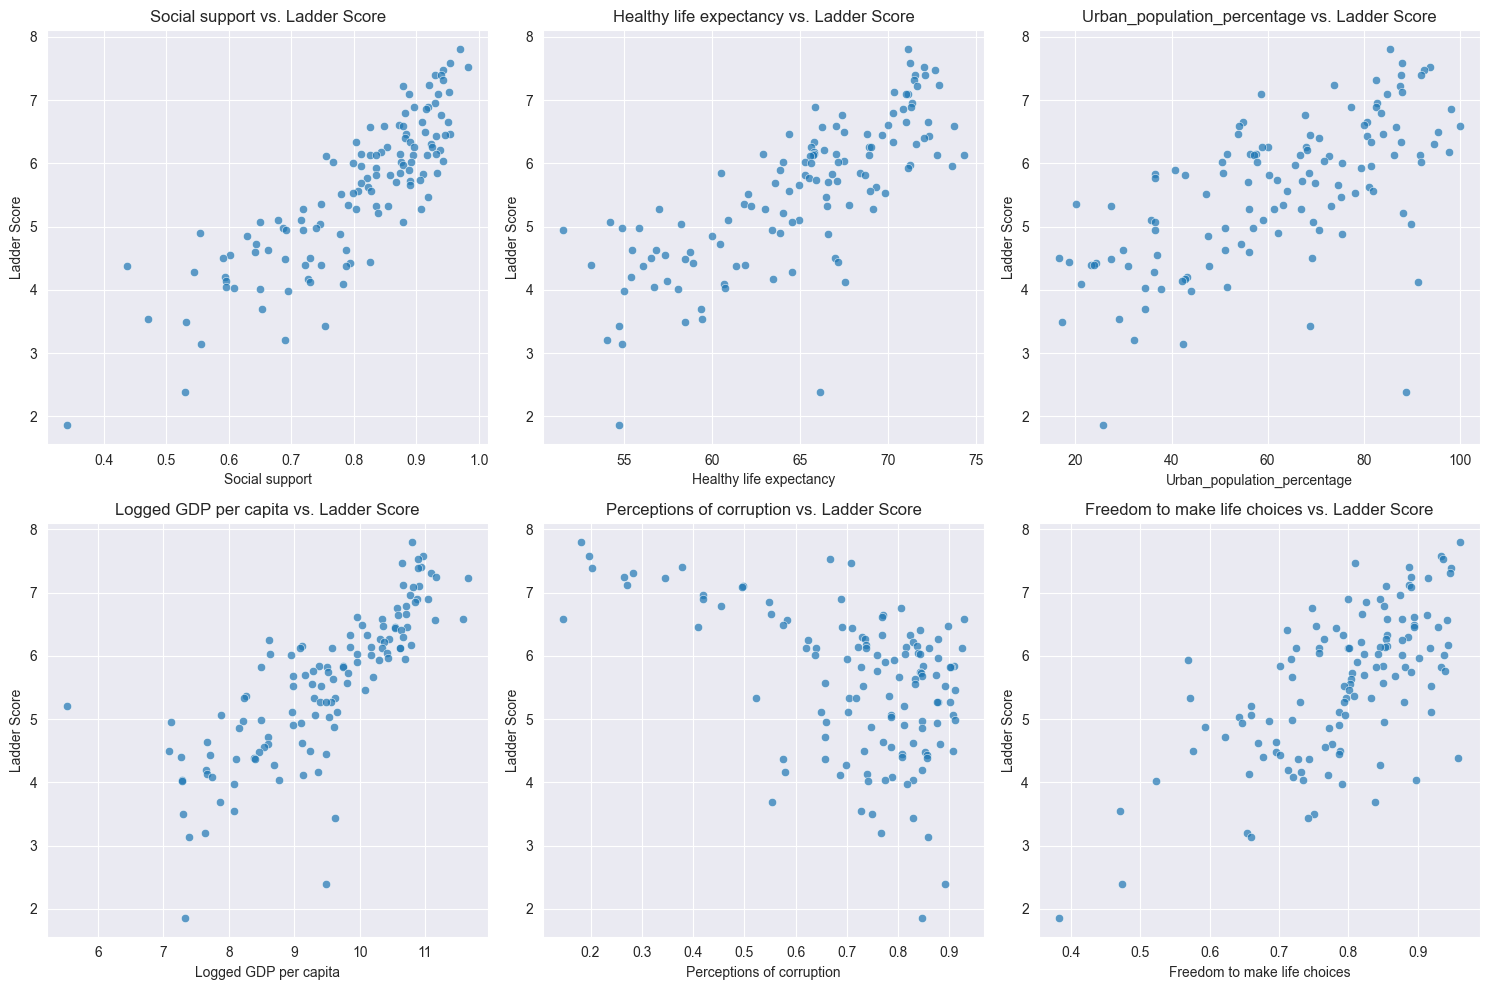

In [16]:
# List of columns to analyse
columns_to_analyse = [
    'Social support',
    'Healthy life expectancy',
    'Urban_population_percentage',
    'Logged GDP per capita',
    'Perceptions of corruption',
    'Freedom to make life choices']

#scatterplot the correlation
num_cols = 3
num_rows = 2

# Create a grid of scatter plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Iterate over the columns and create scatter plots
for i, column in enumerate(columns_to_analyse):
    sns.scatterplot(data=full_data, x=column, y='Ladder score', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'{column} vs. Ladder Score')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Ladder Score')
    axes[i].grid(True)

# Adjust spacing and layout
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
#Now let's compare the factors against the gdp

# Remove the % sign from'Unemployment rate'
full_data['Unemployment rate'] = full_data['Unemployment rate'].str.replace('%', '')
full_data['Unemployment rate'] = full_data['Unemployment rate'].astype(float)

#make a list of the variables correlations
pop_corr= full_data['Logged GDP per capita'].corr(full_data['Population'])
healthy_life_corr= full_data['Logged GDP per capita'].corr(full_data['Healthy life expectancy'])
urban_pop_corr= full_data['Logged GDP per capita'].corr(full_data['Urban_population_percentage'])
unemployment_corr= full_data['Logged GDP per capita'].corr(full_data['Unemployment rate'])

# Display the correlation matrix
print(pop_corr,  healthy_life_corr, urban_pop_corr, unemployment_corr)

-0.025197993215033517 0.8260482734775204 0.7170583177962865 0.07210411507985726


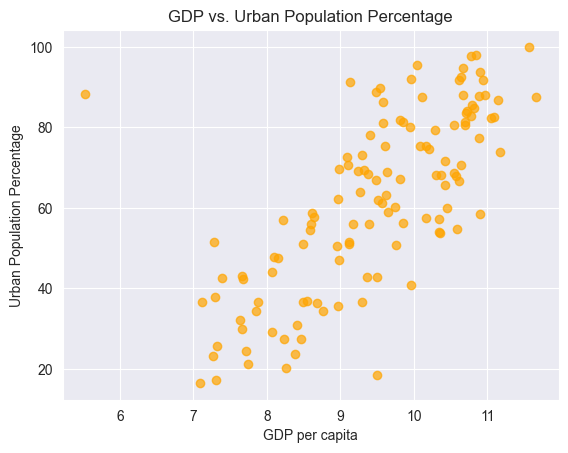

In [18]:
#plot the factors
plt.scatter(
    full_data['Logged GDP per capita'],
    full_data['Urban_population_percentage'],
    label='Urban Population Percentage',
    alpha=0.7,
    color='orange')

# Adding labels and title
plt.xlabel('GDP per capita')
plt.ylabel('Urban Population Percentage')
plt.title('GDP vs. Urban Population Percentage')

plt.show()

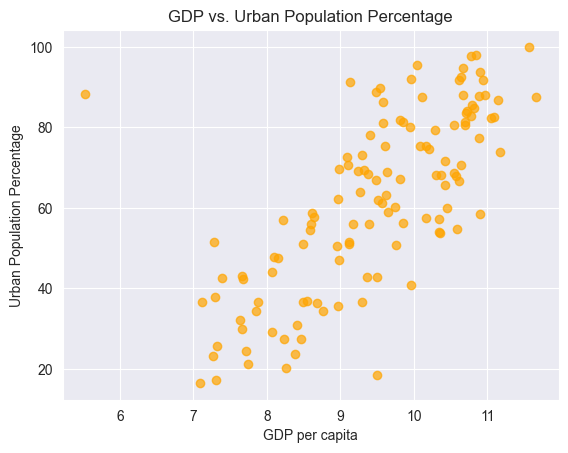

In [19]:
plt.scatter(
    full_data['Logged GDP per capita'],
    full_data['Urban_population_percentage'],
    label='Urban Population Percentage',
    alpha=0.7,
    color='orange')

# Adding labels and title
plt.xlabel('GDP per capita')
plt.ylabel('Urban Population Percentage')
plt.title('GDP vs. Urban Population Percentage')

plt.show()

In [22]:
import plotly.express as px

# Define custom colors for the color scale
custom_color_scale = [
    (0.0, "red"),    # Low scores in red
    (0.5, "orange"), # Medium scores in orange
    (1.0, "green")   # High scores in green
]

fig = px.choropleth(full_data, locations="Country name", locationmode='country names',
                    color="Ladder score", hover_name="Country name",
                    title="World Happiness Report: Ladder score by country",
                    color_continuous_scale=custom_color_scale)

fig.show()

In [23]:
# Create a box plot showing the distribution of happiness scores by sub-region 
fig = px.box(full_data, x='region', y='Ladder score', 
             title='Distribution of Happiness Scores by Continent',
             labels={'region': 'Continent', 'Ladder score': 'Happiness Score'},
             color='region', 
             height=400)

fig.update_layout(xaxis_title='Continent', yaxis_title='Happiness Score')

fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


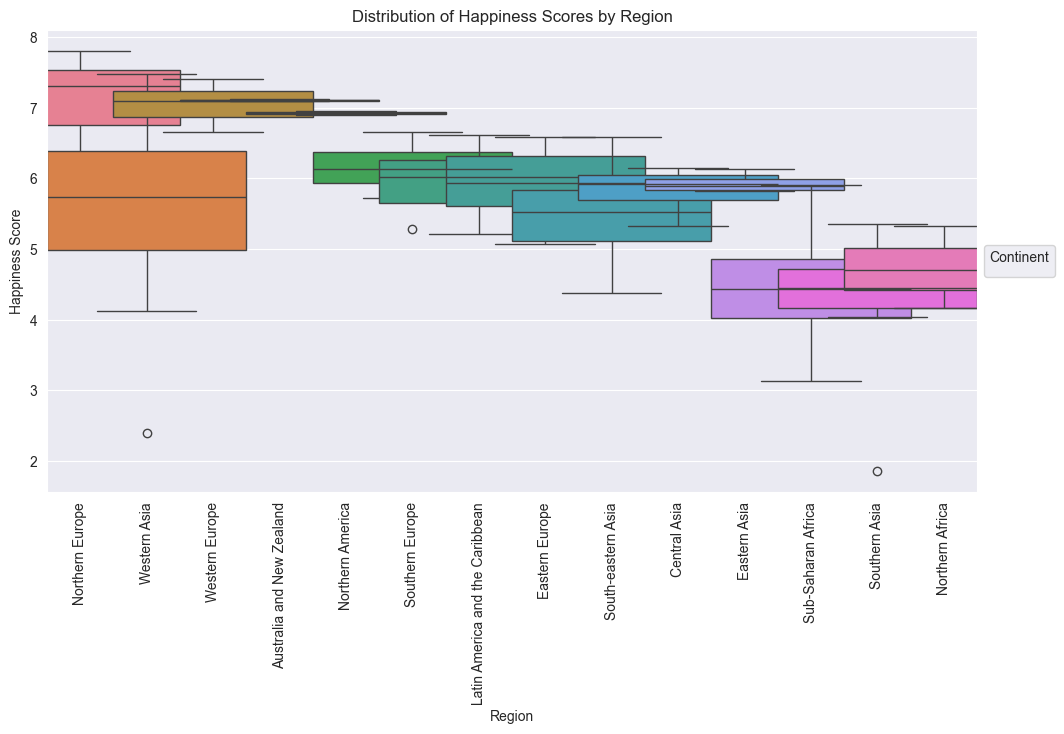

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_data, x='sub-region', y='Ladder score', hue='sub-region', width=3)
plt.title('Distribution of Happiness Scores by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.legend(title='Continent', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

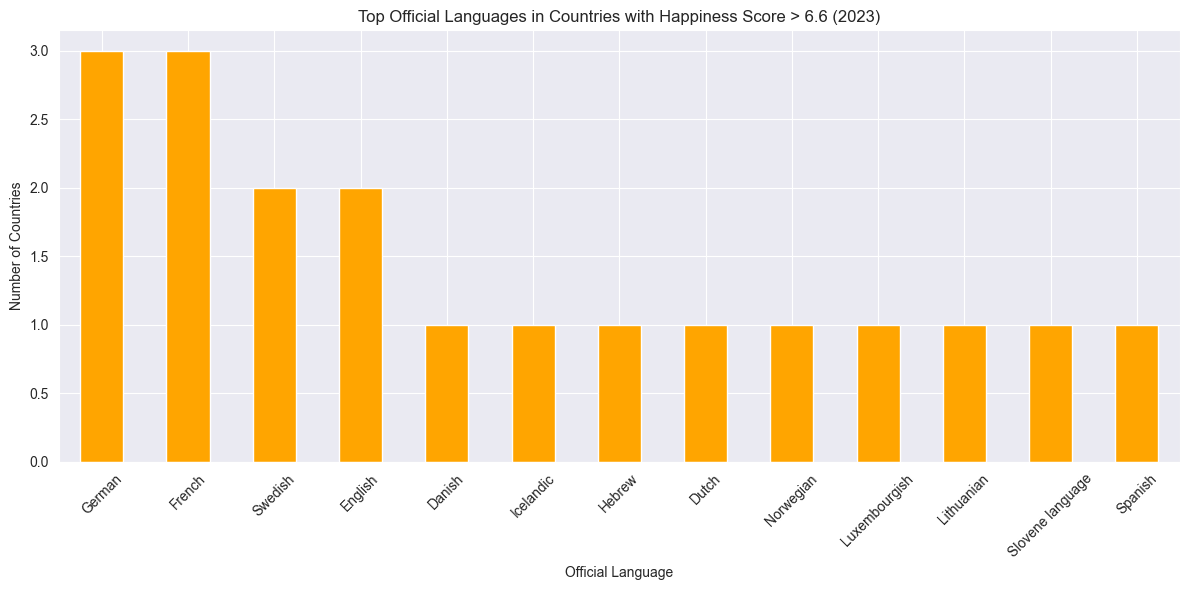

In [26]:
# Get the top 10 official languages among high happiness countries
top_languages = happiest_countries['Official language'].value_counts().head(14)

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
top_languages.plot(kind='bar', color='orange')

# Customize the plot
plt.title('Top Official Languages in Countries with Happiness Score > 6.6 (2023)')
plt.xlabel('Official Language')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# **Conclusions**

Important Factors

From analysing the data above, the most important factors in the Happiness Score of a Country are Social Support and GDP. The wealth of a country also suggests correlation to higher scores in other factors such as the life expectancy and social support. However, it is important to note that correlation is not causation, but it can provide importnat information for governments to understand which factors are important to the well-being of their citizens. 


Geography and Language

Although Oceania and Western European countries are more likely to be higher scoring, there does not seem to be a global correlation between geography and the happiness score of a country. Northern Africa does have the lowest sub-regional score. 

Althought English as the Official Language accounts for 25% of the top 20 scoring countries, the distribution shows that this does not explain global correlation. However, German-speaking countries do tend to have higher scores and less of a distribution. 